# Linear Regression

In [1]:
import pandas as pd
import os
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [2]:
TMDB_filename = os.path.join(os.getcwd(), "TMDB_tv_dataset_v3.csv")
df = pd.read_csv(TMDB_filename)

In [3]:
drop_columns = {'popularity', 'cleaned_overview', 'overview'}

In [4]:
# Creating our labeled examples with 'y' as our label and 'X' being our features
y = df['popularity']
X = df.drop(columns = drop_columns, axis = 1)

In [5]:
# Fill missing values in one-hot encoded columns with -1 or 'Unknown'
X.fillna(-1, inplace=True)  # or use 'Unknown'

We use train_test_split() because we want to split our data into training and test sets.

Train tests are used for fitting the model which means we train our model with this dataset.

Test sets are used to accurately evalute our final model's predicitions.

In [6]:
# Creating the training and test sets out of the labeled examples
# 30% of our data is for the test size, this will be the data used to test the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 1234)

In [7]:
# pd.set_option('display.max_columns', None)
# print(X_train.isnull().sum())

null_columns = X_train.columns[X_train.isnull().any()]
for col in null_columns:
    print(col)

In [8]:
bool_columns = X_train.select_dtypes(include=['bool'])
print(bool_columns.columns)

Index(['type_Documentary', 'type_Miniseries', 'type_News', 'type_Reality',
       'type_Scripted', 'type_Talk Show', 'type_Video', 'status_Canceled',
       'status_Ended', 'status_In Production', 'status_Pilot',
       'status_Planned', 'status_Returning Series', 'first_air_date_winter',
       'first_air_date_spring', 'first_air_date_summer', 'first_air_date_fall',
       'last_air_date_winter', 'last_air_date_spring', 'last_air_date_summer',
       'last_air_date_fall'],
      dtype='object')


Linear Regression

In [9]:
print(X.dtypes)

for col in df.columns:
    print(f"Column: {col}, Type: {df[col].dtype}")

number_of_seasons       float64
number_of_episodes      float64
vote_count              float64
vote_average            float64
adult                   float64
                         ...   
first_air_date_fall        bool
last_air_date_winter       bool
last_air_date_spring       bool
last_air_date_summer       bool
last_air_date_fall         bool
Length: 97, dtype: object
Column: number_of_seasons, Type: float64
Column: number_of_episodes, Type: float64
Column: vote_count, Type: float64
Column: vote_average, Type: float64
Column: overview, Type: object
Column: adult, Type: float64
Column: popularity, Type: float64
Column: episode_run_time, Type: float64
Column: cleaned_overview, Type: object
Column: Action & Adventure, Type: float64
Column: Animation, Type: float64
Column: Comedy, Type: float64
Column: Crime, Type: float64
Column: Documentary, Type: float64
Column: Drama, Type: float64
Column: Family, Type: float64
Column: History, Type: float64
Column: Kids, Type: float64
Column: M

In [10]:
categorical_cols = X.select_dtypes(include=['object']).columns
print(categorical_cols)

Index([], dtype='object')


In [11]:
for column in X.columns:
    missing_count = X[column].isnull().sum()
    print(f"Column: {column}, Missing Values: {missing_count}")

Column: number_of_seasons, Missing Values: 0
Column: number_of_episodes, Missing Values: 0
Column: vote_count, Missing Values: 0
Column: vote_average, Missing Values: 0
Column: adult, Missing Values: 0
Column: episode_run_time, Missing Values: 0
Column: Action & Adventure, Missing Values: 0
Column: Animation, Missing Values: 0
Column: Comedy, Missing Values: 0
Column: Crime, Missing Values: 0
Column: Documentary, Missing Values: 0
Column: Drama, Missing Values: 0
Column: Family, Missing Values: 0
Column: History, Missing Values: 0
Column: Kids, Missing Values: 0
Column: Music, Missing Values: 0
Column: Musical, Missing Values: 0
Column: Mystery, Missing Values: 0
Column: News, Missing Values: 0
Column: Reality, Missing Values: 0
Column: Romance, Missing Values: 0
Column: Sci-Fi & Fantasy, Missing Values: 0
Column: Soap, Missing Values: 0
Column: Talk, Missing Values: 0
Column: War & Politics, Missing Values: 0
Column: Western, Missing Values: 0
Column: original-language_en, Missing Val

In [12]:
LR_model = LinearRegression()
LR_model.fit(X_train, y_train)

LinearRegression()

## Deciding what features to use
* To find what features are the best for the linear regression model, we can check feature importance through coefficients
* In linear regression, the model's coefficients indicate the influence of each feature on the output variable
* We can see what the coefficients are to see what features have more of an impact

In [14]:
# we are creating a data frame that will store the feature names and their corresponding coefficients 
feature_importance = pd.DataFrame({
    "Feature": X_train.columns,
    # the coefficients indicate how much the popularity is expected to increase or decrease
    # when a feature value increases/decreases by one unit, while other features remain constant
    "Coefficient": LR_model.coef_ 
})
# sort the features by absolute value of their coefficients in descending order
# we take the absolute value since they can be either positive or negative 
# a positive coefficient means as the feature value increases, so does the popularity
# a negative coefficient means as the feature value decreases, so does the popularity 
# by taking the absolute value, we focus no the magnitude rather than the direction to see 
# what features affect the popularity the strongest 
feature_importance["AbsCoefficient"] = feature_importance["Coefficient"].abs()
feature_importance.sort_values(by="AbsCoefficient", ascending=False, inplace=True)
feature_importance.style.set_table_attributes('style="max-height:300px; overflow-y:scroll; display:inline-block;"')

,Feature,Coefficient,AbsCoefficient
16,Musical,-11368087447.357307,11368087447.357307
66,production-companies_US,-11293015282.147848,11293015282.147848
81,type_Talk Show,5912897297.641562,5912897297.641562
77,type_Miniseries,5912897297.639681,5912897297.639681
80,type_Scripted,5912897297.639671,5912897297.639671
76,type_Documentary,5912897297.639643,5912897297.639643
79,type_Reality,5912897297.639627,5912897297.639627
82,type_Video,5912897297.638904,5912897297.638904
78,type_News,5912897297.638853,5912897297.638853
88,status_Returning Series,5455190149.672375,5455190149.672375


/var/folders/m4/60ljkntj7gs489xq6yv_ghnm0000gn/T/ipykernel_54968/4173966935.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


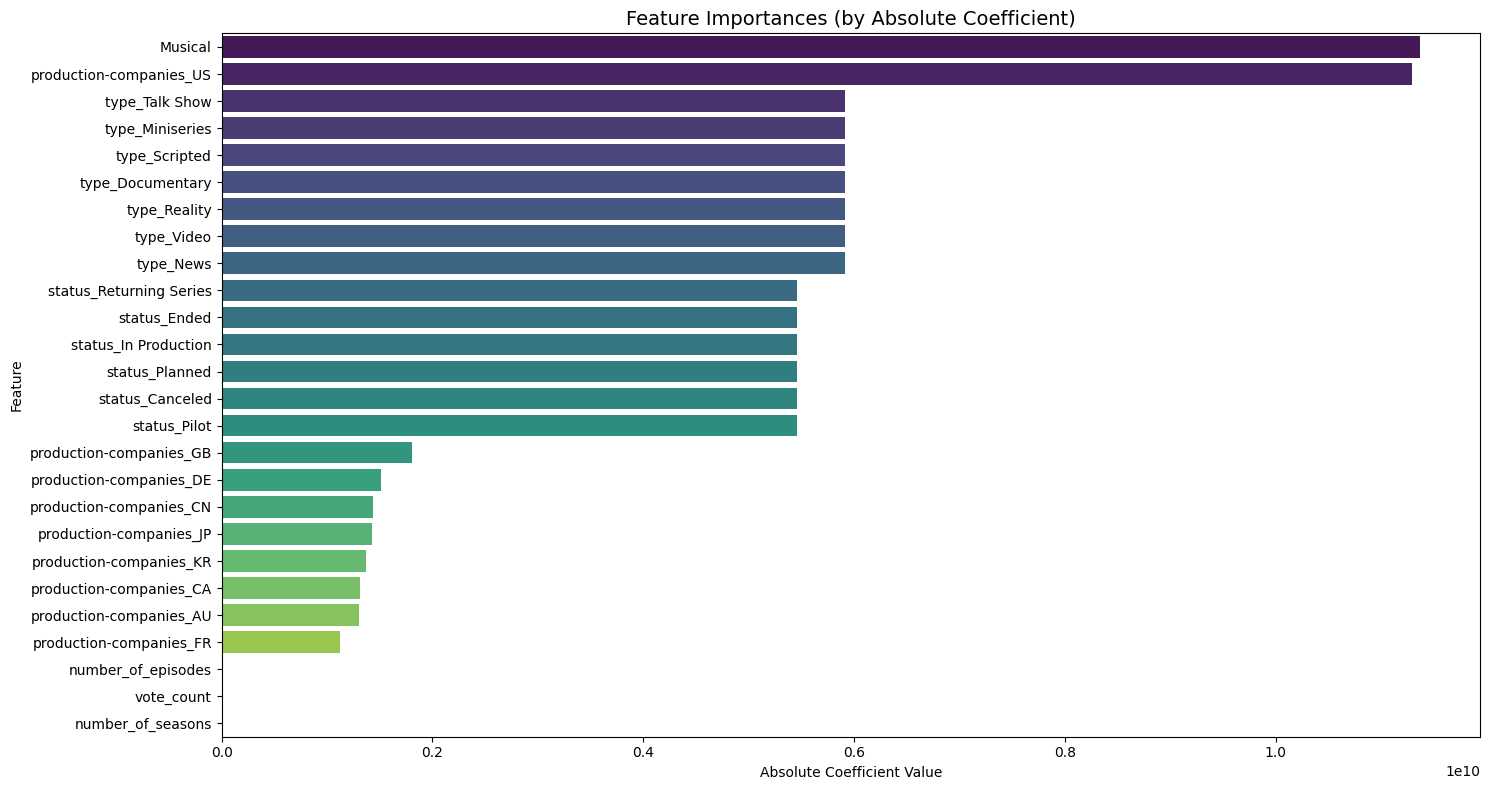

In [21]:
# we can also display the data as a graph to visually see the feature importance
# just going to do the first 26 since these actually show up in the graph
top_features = feature_importance.head(26)

plt.figure(figsize=(15, 8))  # adjust figure size based on the number of features

sns.barplot(
    x="AbsCoefficient", 
    y="Feature", 
    data=top_features,
    palette="viridis"
)

plt.title("Feature Importances (by Absolute Coefficient)", fontsize=14)
plt.xlabel("Absolute Coefficient Value")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [46]:
# testing out using the top 5 features for our model
selected_features = feature_importance["Feature"].head(26).tolist()
print(selected_features)

['Musical', 'production-companies_US', 'type_Talk Show', 'type_Miniseries', 'type_Scripted', 'type_Documentary', 'type_Reality', 'type_Video', 'type_News', 'status_Returning Series', 'status_Ended', 'status_In Production', 'status_Planned', 'status_Canceled', 'status_Pilot', 'production-companies_GB', 'production-companies_DE', 'production-companies_CN', 'production-companies_JP', 'production-companies_KR', 'production-companies_CA', 'production-companies_AU', 'production-companies_FR', 'number_of_episodes', 'vote_count', 'number_of_seasons']


In [47]:
# then subset the training and testing data using this new set of features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

In [48]:
# train the new linear regression model using these top features and make our predictions
LR_model = LinearRegression()
LR_model.fit(X_train_selected, y_train)

y_lr_pred = LR_model.predict(X_test_selected)


In [49]:
# y_lr_pred = LR_model.predict(X_test)

In [50]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_squared_error, root_mean_squared_error

# Compute RMSE using the new function
LR_rmse = root_mean_squared_error(y_test, y_lr_pred)

LR_mse = mean_squared_error(y_test, y_lr_pred)

# Compute R² score
LR_r2 = r2_score(y_test, y_lr_pred)

# Compute MAE using the new function
LR_mae = mean_absolute_error(y_test, y_lr_pred)

# Print the results
print('Linear Regression: Root Mean Squared Error: {}'.format(LR_rmse))
print('Linear Regression: R^2: {}'.format(LR_r2))
print('Linear Regression: Mean Absolute Error: {}'.format(LR_mae))
print('Linear Regression: Mean Squared Error: {}'.format(LR_mse))

print('done')

Linear Regression: Root Mean Squared Error: 5532310.377619454
Linear Regression: R^2: -2.0163148545698534e+17
Linear Regression: Mean Absolute Error: 24599.469465109745
Linear Regression: Mean Squared Error: 30606458114315.9
done
